In [1]:
sc = SparkContext.getOrCreate()

In [17]:
import numpy as np

In [18]:
np.random.rand(5)

array([0.67671768, 0.16851793, 0.31884686, 0.8521572 , 0.28217236])

In [19]:
rdd= sc.parallelize(np.random.rand(100))

In [20]:
rdd.count()

100

In [21]:
rdd.sum()

52.29584384914213

In [33]:
mean=rdd.mean()
mean

0.5229584384914213

In [45]:
rdd.map(lambda x: pow(x-mean,2)).sum()/rdd.count()

0.08301351009197347

In [47]:
# Skewness and kurtosis


In [48]:
rddX = sc.parallelize(range(100))
rddY = sc.parallelize(np.random.rand(100))

In [49]:
rddXY = rddX.zip(rddY)
rddXY.take(10)

[(0, 0.18269109415526774),
 (1, 0.401812160257904),
 (2, 0.48756067831278205),
 (3, 0.6970245988072981),
 (4, 0.42000521178465144),
 (5, 0.3646699646703081),
 (6, 0.7500372793959003),
 (7, 0.6172456630456197),
 (8, 0.7450265427848725),
 (9, 0.673499200313455)]

In [52]:
rddXY.map(lambda x : (x[1],x[0])).take(10)

[(0.18269109415526774, 0),
 (0.401812160257904, 1),
 (0.48756067831278205, 2),
 (0.6970245988072981, 3),
 (0.42000521178465144, 4),
 (0.3646699646703081, 5),
 (0.7500372793959003, 6),
 (0.6172456630456197, 7),
 (0.7450265427848725, 8),
 (0.673499200313455, 9)]

In [53]:
%matplotlib inline

In [54]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x2af5505a4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x2af5505ad68>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af5505a358>],
 'medians': [<matplotlib.lines.Line2D at 0x2af550665f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af55066a20>],
 'means': []}

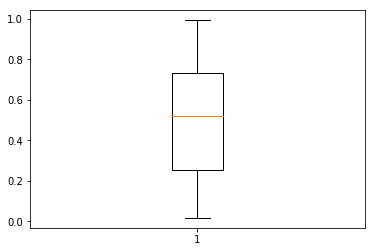

In [64]:
plt.boxplot(rddY.collect())

In [65]:
rddY.take(10)

[0.18269109415526774,
 0.401812160257904,
 0.48756067831278205,
 0.6970245988072981,
 0.42000521178465144,
 0.3646699646703081,
 0.7500372793959003,
 0.6172456630456197,
 0.7450265427848725,
 0.673499200313455]

In [66]:
import pandas as pd 

In [110]:
data=pd.DataFrame(np.random.rand(1000000,10),columns=list('qwertasdfg'))

In [111]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
x=spark.createDataFrame(data)
x.take(10)

C:\Users\yuyon\spark\spark-2.4.3-bin-hadoop2.7\python\pyspark\sql\session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


[Row(q=0.32714709338376613, w=0.8590540692554869, e=0.514009437276346, r=0.7987758283342021, t=0.043442422841515116, a=0.017468279596527747, s=0.914070224830257, d=0.7020093337766202, f=0.26923314863575365, g=0.2929883872938286),
 Row(q=0.17671902594285827, w=0.15099489034391156, e=0.7208118259597877, r=0.2918295744272158, t=0.25692332917850946, a=0.05887124145291456, s=0.33826920725278253, d=0.7953138831691476, f=0.10566327008958731, g=0.7665613591014282),
 Row(q=0.6956363310351964, w=0.1723738975247714, e=0.6952221505377028, r=0.6665477895521164, t=0.3412564974062713, a=0.8564087228832532, s=0.5696926545848164, d=0.8120047049092392, f=0.26646838472175916, g=0.1757739240640811),
 Row(q=0.019017564192622682, w=0.5429341329592853, e=0.96061880426034, r=0.9481880844504572, t=0.7732588053508471, a=0.26936422608723876, s=0.12554806445078825, d=0.29114913704191503, f=0.8254572152049763, g=0.30129076095586027),
 Row(q=0.4024173819838419, w=0.7793270708322609, e=0.42980506201461366, r=0.86801

In [115]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [116]:
assembler= VectorAssembler(inputCols=x.columns,outputCol="features")

In [117]:
features = assembler.transform(x)
features.take(10)
features.rdd.map(lambda r: r.features).take(10)

[DenseVector([0.3271, 0.8591, 0.514, 0.7988, 0.0434, 0.0175, 0.9141, 0.702, 0.2692, 0.293]),
 DenseVector([0.1767, 0.151, 0.7208, 0.2918, 0.2569, 0.0589, 0.3383, 0.7953, 0.1057, 0.7666]),
 DenseVector([0.6956, 0.1724, 0.6952, 0.6665, 0.3413, 0.8564, 0.5697, 0.812, 0.2665, 0.1758]),
 DenseVector([0.019, 0.5429, 0.9606, 0.9482, 0.7733, 0.2694, 0.1255, 0.2911, 0.8255, 0.3013]),
 DenseVector([0.4024, 0.7793, 0.4298, 0.868, 0.7715, 0.5248, 0.7375, 0.7767, 0.3453, 0.2529]),
 DenseVector([0.0784, 0.1829, 0.4123, 0.2315, 0.8433, 0.68, 0.5856, 0.0198, 0.6412, 0.9111]),
 DenseVector([0.269, 0.3388, 0.5594, 0.7835, 0.3503, 0.3884, 0.7784, 0.9383, 0.4405, 0.6008]),
 DenseVector([0.6937, 0.7189, 0.0782, 0.9988, 0.3578, 0.0057, 0.5178, 0.2075, 0.6777, 0.1719]),
 DenseVector([0.0235, 0.7036, 0.7006, 0.4929, 0.3145, 0.48, 0.0836, 0.4473, 0.8687, 0.8981]),
 DenseVector([0.393, 0.5281, 0.336, 0.1045, 0.486, 0.1464, 0.3677, 0.9017, 0.6267, 0.9264])]

In [118]:
pca =  PCA(k=3, inputCol="features",outputCol="pcaFeatures")
model = pca.fit(features)

In [119]:
results_pca = model.transform(features).select("pcaFeatures")
results_pca.show(truncate=False)

+--------------------------------------------------------------+
|pcaFeatures                                                   |
+--------------------------------------------------------------+
|[-0.7577753369281025,-0.05633654597617303,0.23622104866585103]|
|[-0.2211482600427668,0.007980706117541286,0.11523728653503781]|
|[-0.4565610772132461,-0.32033793582744036,0.39258727423766]   |
|[-1.1651927921433545,0.019759463197543736,-0.2930950317855216]|
|[-0.978116146680087,0.01480962038120652,0.4566950912525717]   |
|[-0.7158029958402774,-0.2552892783325478,0.5284107655174065]  |
|[-0.4848916030433389,-0.07796845669695632,0.2537239306105906] |
|[-0.8175553215182253,0.34938318929501083,0.15052645189361696] |
|[-0.6035234212816538,-0.19972777266154798,0.21963539678475602]|
|[-0.22149102132080906,-0.04004799641478307,0.3453682516691934]|
|[-0.5938644821194086,0.26576920648780444,0.13193594525203467] |
|[-0.7802484518038967,0.298003572521622,0.42751439505388344]   |
|[-0.6540436381929517,-0.

In [123]:
x=results_pca.rdd.map(lambda x: x.pcaFeatures).map(lambda a:a[0]).collect()
y=results_pca.rdd.map(lambda x: x.pcaFeatures).map(lambda a:a[1]).collect()
z=results_pca.rdd.map(lambda x: x.pcaFeatures).map(lambda a:a[2]).collect()

In [ ]:
x.shape

In [125]:
from mpl_toolkits.mplot3d import Axes3D

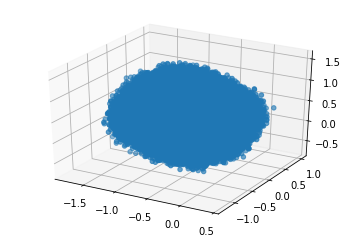

In [126]:
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)
plt.show()